<a href="https://colab.research.google.com/github/VHSajna/0xfolio/blob/master/Manu_corrplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

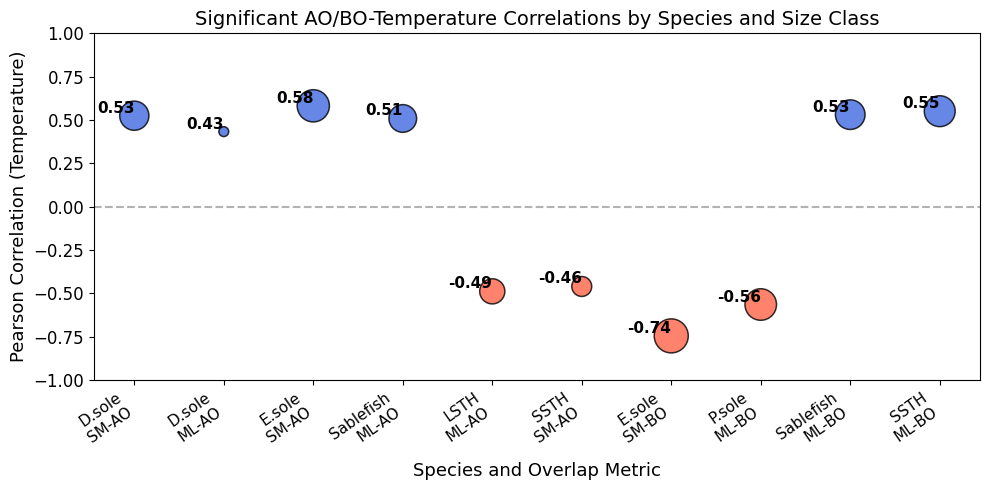

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = [
    ["D.sole", "SM-AO", 0.525, 0.0145],
    ["D.sole", "ML-AO", 0.433, 0.05],
    ["E.sole", "SM-AO", 0.582, 0.00567],
    ["Sablefish", "ML-AO", 0.509, 0.0185],
    ["LSTH", "ML-AO", -0.488, 0.0248],
    ["SSTH", "SM-AO", -0.46, 0.0359],
    ["E.sole", "SM-BO", -0.745, 0.000106],
    ["P.sole", "ML-BO", -0.564, 0.00773],
    ["Sablefish", "ML-BO", 0.531, 0.0133],
    ["SSTH", "ML-BO", 0.551, 0.00961]
]
df = pd.DataFrame(data, columns=["Species", "OverlapType", "Correlation", "P"])
df["SpeciesOverlap"] = df["Species"] + "\n" + df["OverlapType"]
df["color"] = df["Correlation"].apply(lambda x: 'tomato' if x > 0 else 'royalblue')
size_scale = 150
sizes = size_scale * (1 - df["P"]).clip(0.1,1)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(-1,1)
sns.scatterplot(x="SpeciesOverlap", y="Correlation", data=df, hue="color", palette=["royalblue", "tomato"],
                size=sizes, sizes=(50,600), legend=False, edgecolor='black', alpha=0.8)
offset = 0.19
for i, row in df.iterrows():
    ax.text(row["SpeciesOverlap"], row["Correlation"], f"{row['Correlation']:.2f}",
            ha='right', va='bottom', fontsize=11, color='black', fontweight='bold')
ax.set_xlabel('Species and Overlap Metric', fontsize=13)
ax.set_ylabel('Pearson Correlation (Temperature)', fontsize=13)
ax.set_title('Significant AO/BO-Temperature Correlations by Species and Size Class', fontsize=14)
plt.xticks(rotation=35, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.axhline(0, ls='--', color='grey', alpha=0.6)
plt.show()
